# Akron, OH - Asheville, NC Weather Analysis

In [1]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook


## Load CSV data files

In [2]:
akron = pd.read_csv("AkronWeather.csv", parse_dates=["DATE"])

In [3]:
ash = pd.read_csv("AshevilleWeather.csv", parse_dates=["DATE"])

## Change data frames to only include needed fields

In [4]:
akron = akron[["STATION", "DATE", "TAVG"]]

In [5]:
ash = ash[["STATION", "DATE", "TAVG"]]

## Analysis of all months

### Generate descriptive statistics

Akron

In [6]:
akron["TAVG"].describe()

count    1461.000000
mean       51.930869
std        19.175898
min        -6.000000
25%        38.000000
50%        55.000000
75%        69.000000
max        83.000000
Name: TAVG, dtype: float64

In [7]:
akron["TAVG"].median()

55.0

Asheville

In [8]:
ash["TAVG"].describe()

count    1461.000000
mean       56.988364
std        14.726939
min         7.000000
25%        46.000000
50%        59.000000
75%        70.000000
max        80.000000
Name: TAVG, dtype: float64

In [9]:
ash["TAVG"].median()

59.0

### Combine the two datasets into one for generating charts

In [10]:
datasets = [akron, ash]
data = pd.concat(datasets)

### Add station name and month name to datasets for charts

In [11]:
data.loc[data["STATION"]=="USW00014895","STATIONNAME"] = "Akron"
data.loc[data["STATION"]=="USW00003812","STATIONNAME"] = "Asheville"
data["MONTH"] = data["DATE"].dt.month

### Create boxplots

[Text(0, 0.5, 'Average Temperature'), Text(0.5, 0, 'Station')]

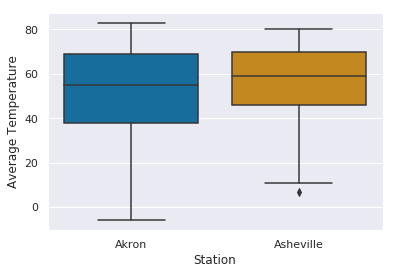

In [12]:
sns.set(palette="colorblind")
ax = sns.boxplot(x="STATIONNAME", y="TAVG", data=data)
ax.set(xlabel="Station", ylabel="Average Temperature")

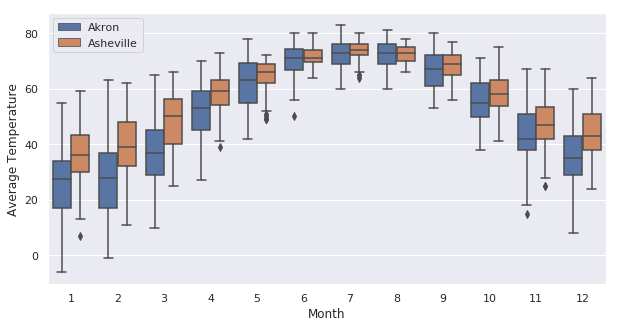

In [13]:
sns.set(palette="colorblind")
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.boxplot(x="MONTH", y="TAVG", hue="STATIONNAME", data=data)
ax.set(xlabel="Month", ylabel="Average Temperature")
plt.legend(loc='upper left', )

### Perform test
Calculate the test statistic

$z = \frac{\bar{x} - \bar{y} - \Delta_5} {\sqrt{\frac{\sigma_1^2} {m} + \frac{\sigma_2^2} {n}}}$

In [14]:
(akron["TAVG"].mean() - ash["TAVG"].mean() + 5)/math.sqrt(
    (akron["TAVG"].var()/akron["TAVG"].count()) + 
    (ash["TAVG"].var()/ash["TAVG"].count())
)

-0.09089198363907022

## Analysis of winter months

### Create dataframes for winter months

In [15]:
akronwinter = akron[akron["DATE"].dt.month.isin([12, 1, 2])]
ashwinter = ash[ash["DATE"].dt.month.isin([12, 1, 2])]

### Create descriptive statistics for winter months

Akron

In [16]:
akronwinter["TAVG"].describe()

count    361.000000
mean      29.700831
std       13.163680
min       -6.000000
25%       20.000000
50%       31.000000
75%       39.000000
max       63.000000
Name: TAVG, dtype: float64

In [17]:
akronwinter["TAVG"].median()

31.0

Asheville

In [18]:
ashwinter["TAVG"].describe()

count    361.000000
mean      39.936288
std       10.420004
min        7.000000
25%       33.000000
50%       40.000000
75%       48.000000
max       64.000000
Name: TAVG, dtype: float64

In [19]:
ashwinter["TAVG"].median()

40.0

### Combine the two datasets into one for generating charts

In [20]:
winterdatasets = [akronwinter, ashwinter]
datawinter = pd.concat(winterdatasets)

### Add fields for station name and month for charts

In [21]:
datawinter.loc[datawinter["STATION"]=="USW00014895","STATIONNAME"] = "Akron"
datawinter.loc[datawinter["STATION"]=="USW00003812","STATIONNAME"] = "Asheville"
datawinter["MONTH"] = datawinter["DATE"].dt.month

### Create winter boxplots

[Text(0, 0.5, 'Average Temperature'), Text(0.5, 0, 'Station')]

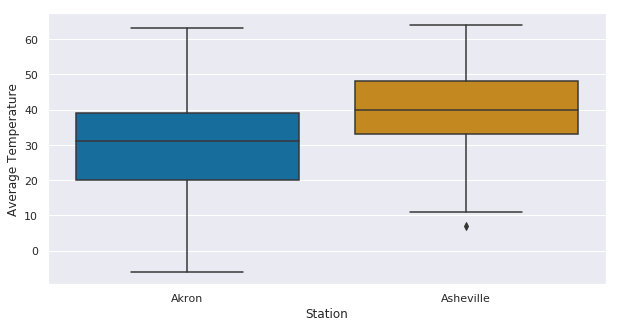

In [22]:
sns.set(palette="colorblind")
ax = sns.boxplot(x="STATIONNAME", y="TAVG", data=datawinter)
ax.set(xlabel="Station", ylabel="Average Temperature")

### Perform test for winter months
Calculate the test statistic

$z = \frac{\bar{x} - \bar{y} - \Delta_{-8}} {\sqrt{\frac{\sigma_1^2} {m} + \frac{\sigma_2^2} {n}}}$

In [39]:
(akronwinter["TAVG"].mean() - ashwinter["TAVG"].mean() + 8)/math.sqrt(
    (akronwinter["TAVG"].var()/akronwinter["TAVG"].count()) + 
    (ashwinter["TAVG"].var()/ashwinter["TAVG"].count())
)

-2.529903837542386

## Analysis of summer months

### Create dataframes for summer months

In [24]:
akronsummer = akron[akron["DATE"].dt.month.isin([6,7,8])]
ashsummer = ash[ash["DATE"].dt.month.isin([6,7,8])]

### Create descriptive statistics for summer months

Akron

In [25]:
akronsummer["TAVG"].describe()

count    368.000000
mean      71.774457
std        5.222118
min       50.000000
25%       68.000000
50%       72.000000
75%       75.250000
max       83.000000
Name: TAVG, dtype: float64

In [26]:
akronsummer["TAVG"].median()

72.0

Asheville

In [27]:
ashsummer["TAVG"].describe()

count    368.000000
mean      72.633152
std        3.276319
min       64.000000
25%       71.000000
50%       73.000000
75%       75.000000
max       80.000000
Name: TAVG, dtype: float64

In [28]:
ashsummer["TAVG"].median()

73.0

### Combine the two datasets into one for generating charts

In [29]:
summerdatasets = [akronsummer, ashsummer]
datasummer = pd.concat(summerdatasets)

### Add fields for stations name and month for charts

In [30]:
datasummer.loc[datasummer["STATION"]=="USW00014895","STATIONNAME"] = "Akron"
datasummer.loc[datasummer["STATION"]=="USW00003812","STATIONNAME"] = "Asheville"
datasummer["MONTH"] = datasummer["DATE"].dt.month

### Create summer boxplots

[Text(0, 0.5, 'Average Temperature'), Text(0.5, 0, 'Station')]

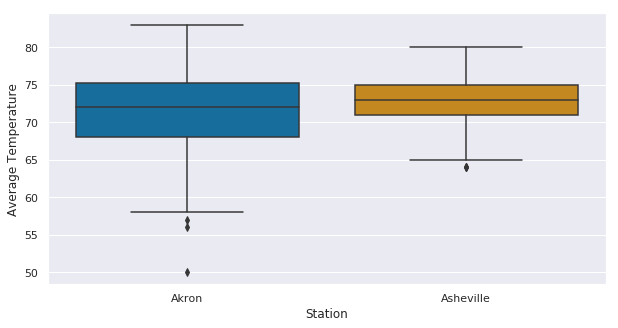

In [31]:
sns.set(palette="colorblind")
ax = sns.boxplot(x="STATIONNAME", y="TAVG", data=datasummer)
ax.set(xlabel="Station", ylabel="Average Temperature")

### Perform test for summer months
Calculate test statistic

$z = \frac{\bar{x} - \bar{y} - \Delta_{-2}} {\sqrt{\frac{\sigma_1^2} {m} + \frac{\sigma_2^2} {n}}}$

In [37]:
(akronsummer["TAVG"].mean() - ashsummer["TAVG"].mean() + 2)/math.sqrt(
    (akronsummer["TAVG"].var()/akronsummer["TAVG"].count()) + 
    (ashsummer["TAVG"].var()/ashsummer["TAVG"].count())
)

3.5514544699869615